In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Supervised Learning Part 1 -- Classification

To visualize the workings of machine learning algorithms, it is often helpful to study two-dimensional or one-dimensional data, that is data with only one or two features. While in practice, datasets usually have many more features, it is hard to plot high-dimensional data in on two-dimensional screens.

We will illustrate some very simple examples before we move on to more "real world" data sets.


First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [16]:
from sklearn.datasets import make_blobs # use scikit-learn to generate data

X, y = make_blobs(centers=2, random_state=0, cluster_std = 1.0) # default cluster_std = 1

print('X ~ n_samples by n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples (X):\n', X[:5, :])
print('\nFirst 5 labels (y):', y[:5])

X ~ n_samples by n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples (X):
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels (y): [1 1 0 0 1]


As the data is two-dimensional, we can plot each sample as a point in a two-dimensional coordinate system, with the first feature being the x-axis and the second feature being the y-axis.

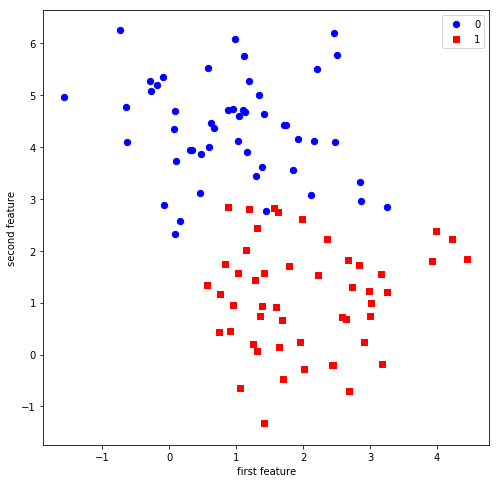

In [10]:
plt.figure(figsize=(8,8))

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

The goal is to predict the color (the class) from the 2d coordinates of the points.

Classification is a supervised task, and since we are interested in its performance on unseen data, we split our data into two parts:

1. a training set that the learning algorithm uses to fit the model
2. a test set to evaluate the generalization performance of the model

The ``train_test_split`` function from the ``model_selection`` module does that for us -- we will use it to split a dataset into 75% training data and 25% test data.

<img src="figures/train_test_split_matrix.svg" width="90%">


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=1234,
    stratify=y
)

### The scikit-learn estimator API
<img src="figures/supervised_workflow.svg" width="80%">


Every algorithm is exposed in scikit-learn via an ''Estimator'' object. (All models in scikit-learn have a very consistent interface). For instance, we first import the logistic regression class.

**Note:** We will start simple, so we use linear models.
Linear models can be simple, but some of them are state-of-the-art.
They are usually easy train, and are usually very performant in terms of prediction time.

In [12]:
from sklearn.linear_model import LogisticRegression

Next, we instantiate the estimator object, a logistic regression.

**Note:** Logistic regression, while it has the word "regression" in it, is actually a **classifier**!

In [13]:
classifier = LogisticRegression()

In [14]:
X_train.shape

(75, 2)

In [20]:
y_train.shape

(75,)

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [21]:
classifier.fit(X_train, y_train)

/home/anthony/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

(Some estimator methods such as `fit` return `self` by default. Thus, after executing the code snippet above, you will see the default parameters of this particular instance of `LogisticRegression`. Another way of retrieving the estimator's ininitialization parameters is to execute `classifier.get_params()`, which returns a parameter dictionary.)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [22]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

In [24]:
print(prediction)
print(y_test)

print(prediction == y_test)

[1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0]
[1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0]
[ True False  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True]


We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [25]:
np.mean(prediction == y_test)

0.84

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [26]:
classifier.score(X_test, y_test)

0.84

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [27]:
classifier.score(X_train, y_train)

0.9466666666666667

`LogisticRegression` is a so-called linear model,
that means it will create a decision that is linear in the input space (so it is just a linear line that separates the points). This simply means it finds a line to separate the blue points from the red points:

/home/anthony/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


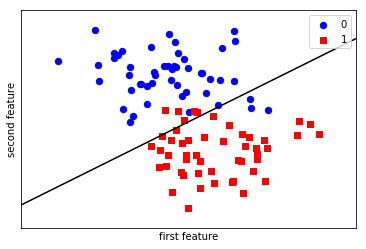

In [28]:
from figures import plot_2d_separator

plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

**Estimated parameters**: All the estimated model parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [29]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.38092515 -1.49993172]]
[1.54995538]


**Note:**
These attributes are stored with an underscore "\_" at the end of the attribute name.
This is because these attributes are only available after fitting, meaning that they depend on the data being given.

If you inspect the sklearn objects, there is a distinction between (1) attribute objects provided by the user, and (2) the attributes that come from learning or fitting. Attributes that end with "\_" are the ones of type 2.

**Note about linear models:**
If we don't have a lot of observations, but we are intrinsically in high dimensions, we can consider using linear models. 
We should think carefully before using non-linear models, because we might overfit.
So in these cases, linear models are actually very powerful!

**For example**, according to the speaker, in neuroscience (small number of observations ((MRIs and scans are expensive), but high-dimensional data), linear models are actually the models of choice!

Another classifier: K Nearest Neighbors
------------------------------------------------
Another popular and easy to understand classifier is K nearest neighbors (kNN).  It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for `LogisticRegression` above.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at **one** nearest neighbor:

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)

We fit the model with out training data

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

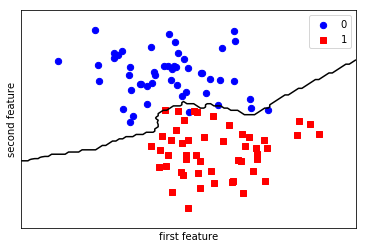

In [38]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

We see that actually that the one single blue dot is segregated by the decision function.
This line is very squiggly, and might not be the best decision boundary (that we could draw).
--> We can try to increase the number of nearest neighbors to tweak the decision boundary.

In [39]:
knn.score(X_test, y_test)

0.92

In [40]:
knn.score(X_train, y_train)

0.9866666666666667

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.
      </li>
    </ul>
</div>

(150, 4)
(150,)
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9


Text(0, 0.5, 'Accuracy')

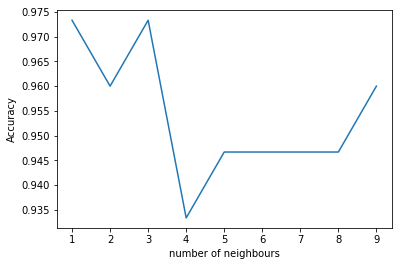

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors vote

iris = load_iris()
X, y = iris.data, iris.target

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42
)

scores = []
k_values = np.arange(1,10)
for k in k_values:
    irisknn = KNeighborsClassifier(n_neighbors=k)
    irisknn.fit(X_train, y_train)
    print("k = ", k)
    #print(irisknn.score(X_train, y_train))
    #print(irisknn.score(X_test, y_test))
    scores.append(irisknn.score(X_test, y_test))

plt.plot(k_values, scores)
plt.xlabel("number of neighbours")
plt.ylabel("Accuracy")

In [61]:
# %load solutions/05A_knn_with_diff_k.py

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

X_trainsub, X_valid, y_trainsub, y_valid = train_test_split(X_train, y_train,
                                                            test_size=0.5,
                                                            random_state=1234,
                                                            stratify=y_train)

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    train_score = knn.fit(X_trainsub, y_trainsub).\
        score(X_trainsub, y_trainsub)
    valid_score = knn.score(X_valid, y_valid)
    print('k: %d, Train/Valid Acc: %.3f/%.3f' %
          (k, train_score, valid_score))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))
